In [14]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz

from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

import seaborn as sns

In [34]:
data_iris = load_iris()
print("Feature names:", data_iris.feature_names)
print("Target names:", data_iris.target_names)
print("Shape:", data_iris.data.shape)

X_train, X_test, y_train, y_test = train_test_split(data_iris.data, data_iris.target, test_size=0.20)
y_train = y_train.reshape((y_train.shape[0], 1))
X_train = pd.DataFrame(data=np.c_[X_train, y_train], columns=data_iris.feature_names + ['target'])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape: (150, 4)


In [32]:
data_boston = load_boston()
print(data_boston.DESCR)
print("Shape:", data_boston.data.shape)

X_train, X_test, y_train, y_test = train_test_split(data_boston.data, data_boston.target, test_size=0.20)
X_train = pd.DataFrame(data=X_train, columns=data_boston.feature_names)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [48]:
def descr_stats(df, by_target=True):
    if by_target and 'target' in df.columns:
        return X_train.groupby('target').agg(['min', 'mean', 'max', 'std']).stack([0])
    else:
        return X_train.agg(['min', 'mean', 'max', 'std']).T
print(descr_stats(X_train, by_target=False))

                   min      mean  max       std
sepal length (cm)  4.4  5.844167  7.9  0.792697
sepal width (cm)   2.0  3.079167  4.2  0.428775
petal length (cm)  1.2  3.764167  6.9  1.768482
petal width (cm)   0.1  1.202500  2.5  0.775731
target             0.0  1.008333  2.0  0.835110


<Figure size 432x288 with 0 Axes>

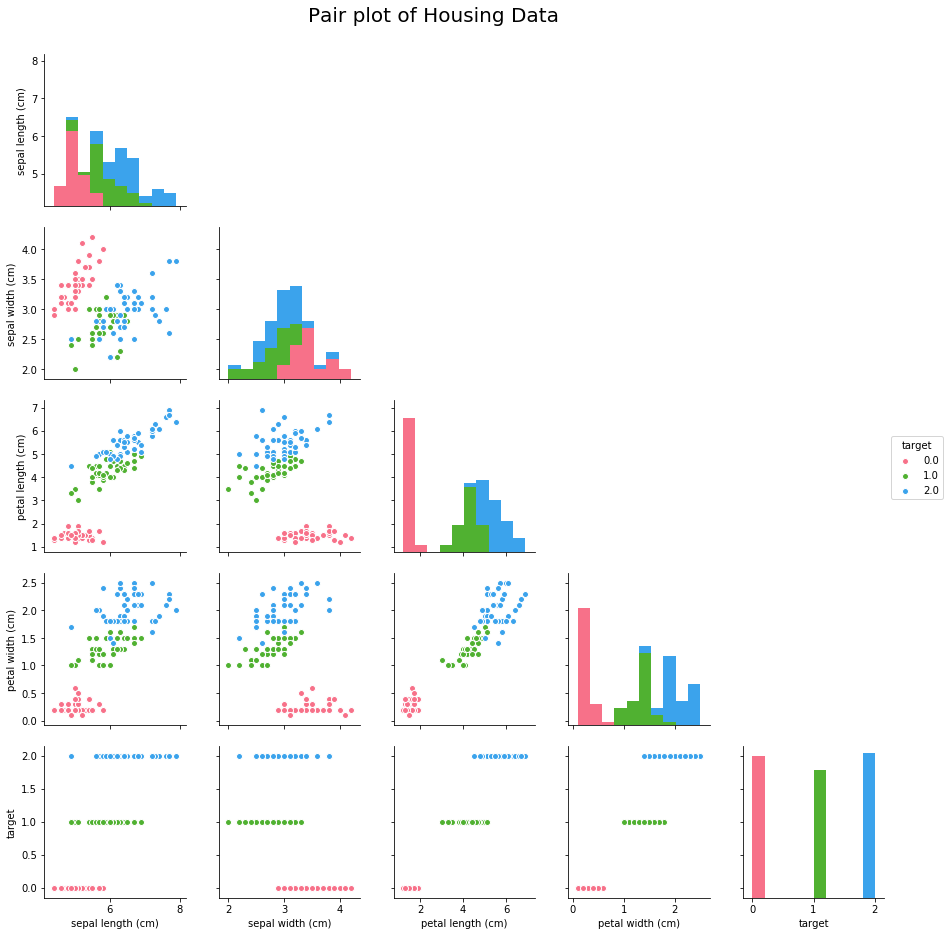

In [35]:
def scttr_matrix(df, title, diag="hist"):
    plt.figure()
    if 'target' in df.columns:
        p = sns.pairplot(data=df, hue='target', dropna=True, palette="husl", diag_kind=diag)
    else:
        p = sns.pairplot(data=df, dropna=True, palette="husl", diag_kind=diag)

    for i,j in zip(*np.triu_indices_from(p.axes,1)):
        p.axes[i, j].set_visible(False)

    p.fig.text(0.33, 1.02, "Pair plot of " + title, fontsize=20)
    plt.show()

scttr_matrix(X_train,"Housing Data")

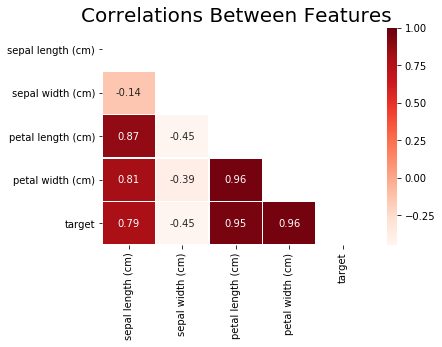

In [36]:
def make_corr_matrix(df):
    correlation = df.corr().round(2)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(correlation, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    setting = "g"
    plt.figure()
    sns.heatmap(correlation, mask=mask, annot=True, cmap='Reds', fmt=setting, linewidths=.5)
    plt.title("Correlations Between Features", fontsize=20)
    
make_corr_matrix(X_train)